# Chapter 3 - Ex1: Marketing Data
Cho dữ liệu MarketingData.csv chứa số tiền chi tiêu hàng năm của 20.000 khách hàng của
một công ty bán lẻ lớn. Nhóm tiếp thị của công ty đã sử dụng các kênh khác nhau để bán
hàng hóa và đã phân loại khách hàng dựa trên các giao dịch mua được thực hiện bằng các
kênh khác nhau, như sau: 0-Retail (Bán lẻ), 1-Road Show, 2-Social Media và 3-Televison.

Là phụ trách bộ phận Sale, bạn được giao nhiệm vụ xây dựng một mô hình Machine Learning
có thể dự đoán kênh hiệu quả nhất có thể được sử dụng để nhắm mục tiêu khách hàng dựa
trên chi tiêu hàng năm cho các sản phẩm (features) do công ty bán: Fresh (sản phẩm tươi
sống), Milk(sữa), Grocery (tạp hóa), Frozen (sản phẩm đông lạnh), Detergents_Paper (chất
tẩy rửa và giấy) và Delicassen (đồ ăn nhanh).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu, tiền xử lý dữ liệu

In [2]:
data = pd.read_csv('MarketingData.csv')
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [3]:
data.shape

(20000, 7)

In [4]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel             0
dtype: int64

In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


In [6]:
data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [9]:
X = data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = data['Channel']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
models = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=300)
models.fit(X_train,y_train)

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [16]:
y_pred = models.predict(X_test)

In [17]:
models.score(X,y)

0.6755

In [18]:
models.score(X_train,y_train)

0.6745625

In [19]:
models.score(X_test,y_test)

0.67925

In [32]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix,accuracy_score

In [21]:
precision_recall_fscore_support(y_test,y_pred,average='micro')

(0.67925, 0.67925, 0.67925, None)

In [22]:
precision_recall_fscore_support(y_test,y_pred,average='macro')

(0.6750866854839646, 0.6785115125221878, 0.6761930481883371, None)

In [25]:
target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Retail       0.68      0.65      0.67       982
    RoadShow       0.52      0.51      0.52       988
 SocialMedia       0.70      0.67      0.69      1027
   Televison       0.80      0.88      0.84      1003

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[641, 212,  76,  53],
       [180, 504, 176, 128],
       [ 83, 212, 692,  40],
       [ 34,  41,  48, 880]], dtype=int64)

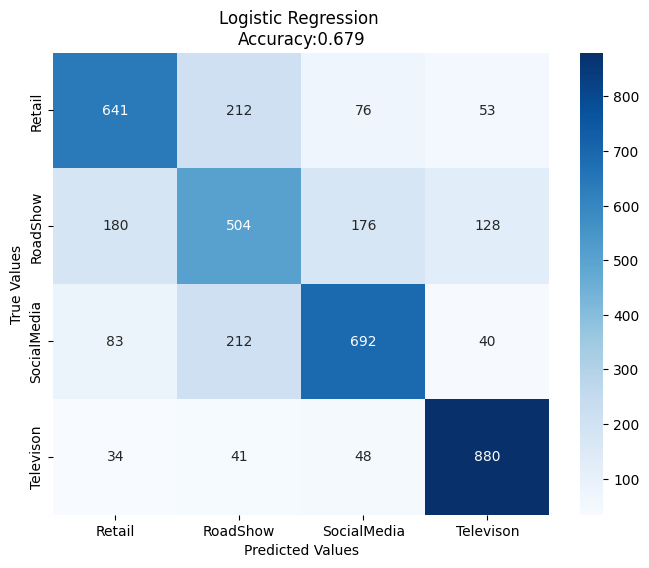

In [34]:
cm_df = pd.DataFrame(cm,
index = target_names,
columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Nhận xét:
Model cho độ chính xác ~70% chưa được cao
Có giải pháp nào khác không?
Nếu chưa tìm được giải pháp nào phù hợp hơn thì có thể nghĩ đến việc phải thay đổi thuật
toán (sẽ học sau)